# STOCK PORTFOLIO MONITORING AND VISUALISATION

In [2]:
!pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 2.4 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 2.4 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 2.4 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.4 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.8 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.9 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metada

# IMPORTING LIBRARIES

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',

'ITC.NS', 'LT.NS', 'SBIN.NS', 'HINDUNILVR.NS', 'ASIANPAINT.NS']


# DOWNLOADING STOCK DATA

In [4]:
start_date = '2015-01-01'

end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(tickers, start=start_date, end=end_date,
group_by='ticker', auto_adjust=True)


[*********************100%***********************]  10 of 10 completed


# ENTER INVESTMENT AMOUNT

In [11]:
def get_investment_amount():
    while True:
        try:
            amount = float(input("Enter your total investment amount (in ₹): "))
            if amount <= 0:
                print("Amount must be positive.")
                continue
            return amount
        except ValueError:
            print("Invalid input. Please enter a number.")

investment_amount = get_investment_amount()


Enter your total investment amount (in ₹):  500000


# CHOOSING THE ALLOCATION METHOD

In [14]:
print("\nChoose allocation method:")
print("1. Enter amount per stock")
print("2. Enter percentage weights")

while True:
    choice = input("Enter 1 or 2: ")
    if choice in ['1', '2']:
        break
    else:
        print("Invalid choice. Please enter 1 or 2.")




Choose allocation method:
1. Enter amount per stock
2. Enter percentage weights


Enter 1 or 2:  1


In [16]:
weights = []

if choice == '1':
    investment_amounts = []
    print("\nEnter amount allocated to each stock (in ₹)")
    for ticker in tickers:
        while True:
            try:
                amt = float(input(f"{ticker}: "))
                if amt < 0:
                    print("Amount cannot be negative.")
                    continue
                investment_amounts.append(amt)
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
    
    total_allocated = sum(investment_amounts)
    if abs(total_allocated - investment_amount) > 1e-2:
        print(f"\n❌ Total allocated ₹{total_allocated:.2f} does not match investment amount ₹{investment_amount:.2f}. Please retry.")
        exit()
    
    weights = [amt / investment_amount for amt in investment_amounts]

else:
    print("\nEnter portfolio weights for each stock as a percentage (e.g., 10 for 10%)")
    for ticker in tickers:
        while True:
            try:
                w = float(input(f"{ticker}: "))
                if w < 0 or w > 100:
                    print("Please enter a value between 0 and 100.")
                    continue
                weights.append(w / 100)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    
    total_weight = sum(weights)
    if abs(total_weight - 1.0) > 1e-6:
        print(f"\n❌ The total weights add up to {total_weight*100:.2f}%. Please ensure they sum to 100%.")
        exit()



Enter amount allocated to each stock (in ₹)


RELIANCE.NS:  50000
TCS.NS:  50000
INFY.NS:  50000
HDFCBANK.NS:  50000
ICICIBANK.NS:  50000
ITC.NS:  50000
LT.NS:  50000
SBIN.NS:  50000
HINDUNILVR.NS:  50000
ASIANPAINT.NS:  50000


# FINAL PORTFOLIO ALLOCATION

In [19]:
print("Final Portfolio Allocation:")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {weights[i]*100:.2f}% → ₹{weights[i]*investment_amount:.2f}")


Final Portfolio Allocation:
RELIANCE.NS: 10.00% → ₹50000.00
TCS.NS: 10.00% → ₹50000.00
INFY.NS: 10.00% → ₹50000.00
HDFCBANK.NS: 10.00% → ₹50000.00
ICICIBANK.NS: 10.00% → ₹50000.00
ITC.NS: 10.00% → ₹50000.00
LT.NS: 10.00% → ₹50000.00
SBIN.NS: 10.00% → ₹50000.00
HINDUNILVR.NS: 10.00% → ₹50000.00
ASIANPAINT.NS: 10.00% → ₹50000.00


# CALCULATING THE NUMBER OF SHARES PURCHASED IN THE INITIAL PERIOD (2015), UNINVESTED CASH

In [22]:
import math

first_day_prices = {}

for ticker in tickers:
    ticker_data = data[ticker]
    ticker_data = ticker_data.dropna(subset=['Close'])
    
    ticker_data.index = pd.to_datetime(ticker_data.index)
    
    first_date = ticker_data[ticker_data.index.year == 2015].index[0]
    first_price = ticker_data.loc[first_date, 'Close']
    first_day_prices[ticker] = first_price

print("Number of shares purchased on first trading day of 2015:")

shares_purchased = {}
total_invested = 0

for i, ticker in enumerate(tickers):
    allocated_amount = investment_amount * weights[i]
    
    num_shares = math.floor(allocated_amount / first_day_prices[ticker]) 
    
    invested_amount = num_shares * first_day_prices[ticker]
    total_invested += invested_amount
    shares_purchased[ticker] = num_shares
    print(f"{ticker}: {num_shares} shares at ₹{first_day_prices[ticker]:.2f} each → ₹{invested_amount:.2f}")

print(f"\nTotal invested (on shares): ₹{total_invested:.2f}")
print(f"Uninvested cash remaining: ₹{investment_amount - total_invested:.2f}")


Number of shares purchased on first trading day of 2015:
RELIANCE.NS: 247 shares at ₹202.24 each → ₹49954.41
TCS.NS: 48 shares at ₹1032.98 each → ₹49583.03
INFY.NS: 129 shares at ₹386.33 each → ₹49836.10
HDFCBANK.NS: 113 shares at ₹440.34 each → ₹49758.82
ICICIBANK.NS: 171 shares at ₹291.49 each → ₹49845.58
ITC.NS: 277 shares at ₹179.96 each → ₹49848.00
LT.NS: 58 shares at ₹850.51 each → ₹49329.72
SBIN.NS: 178 shares at ₹279.88 each → ₹49818.73
HINDUNILVR.NS: 76 shares at ₹649.78 each → ₹49382.99
ASIANPAINT.NS: 72 shares at ₹693.54 each → ₹49935.05

Total invested (on shares): ₹497292.42
Uninvested cash remaining: ₹2707.58


# TOTAL PORTFOLIO VALUE

In [25]:
portfolio_values = pd.DataFrame(index=data.index)

for ticker in tickers:
    portfolio_values[ticker] = data[ticker]['Close'] * shares_purchased[ticker]

portfolio_values['Stock Value'] = portfolio_values[tickers].sum(axis=1)

uninvested_cash = investment_amount - sum(
    shares_purchased[ticker] * first_day_prices[ticker] for ticker in tickers
)

portfolio_values['Total Value'] = portfolio_values['Stock Value'] + uninvested_cash


# PLOTTING TOTAL PORTFOLIO VALUE

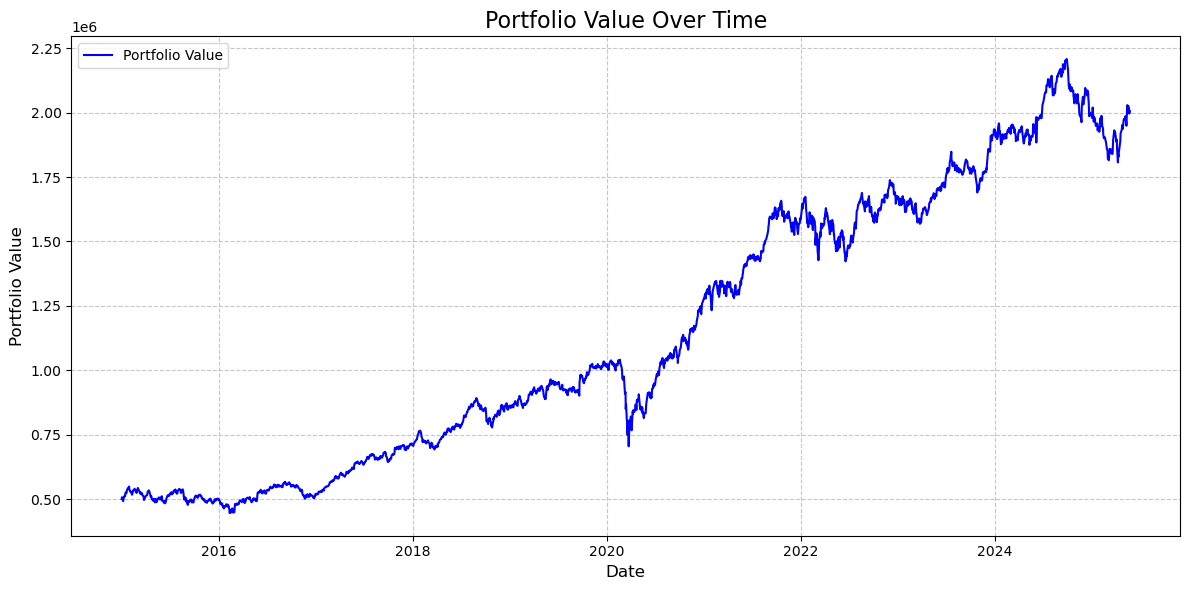

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values['Total Value'], label="Portfolio Value", color='blue')
plt.title("Portfolio Value Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Year-wise Portfolio Summary (from 2015):


,Portfolio Value,% Gain/Loss from 2015
Year,,
2015,"₹500,144.41",+0.03%
2016,"₹519,625.34",+3.93%
2017,"₹715,111.94",+43.02%
2018,"₹860,621.67",+72.12%
2019,"₹1,013,473.37",+102.69%
2020,"₹1,276,627.95",+155.33%
2021,"₹1,594,309.99",+218.86%
2022,"₹1,666,780.64",+233.36%
2023,"₹1,930,464.91",+286.09%


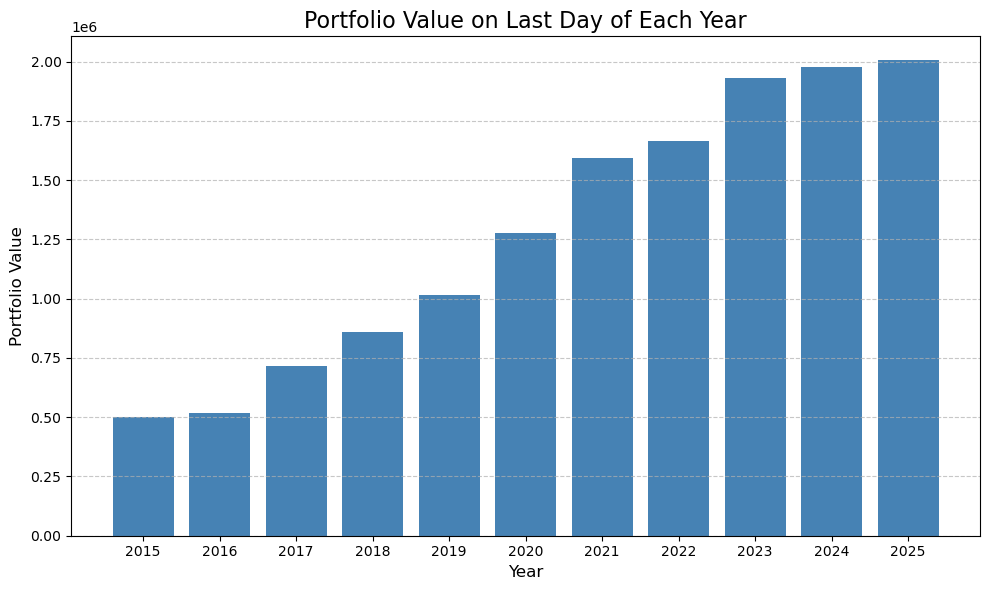

In [72]:

portfolio_values.index = pd.to_datetime(portfolio_values.index)

year_end_values = portfolio_values['Total Value'].resample('YE').last()
year_end_values.index = year_end_values.index.year 

initial_value = portfolio_values.loc[portfolio_values.index.year == 2015, 'Total Value'].iloc[0]

summary_df = pd.DataFrame({
    'Year': year_end_values.index,
    'Portfolio Value': year_end_values.values,
    '% Gain/Loss from 2015': ((year_end_values.values - initial_value) / initial_value) * 100
}).set_index('Year')


print(" Year-wise Portfolio Summary (from 2015):")
display(summary_df.style.format({
    'Portfolio Value': '₹{:,.2f}', 
    '% Gain/Loss from 2015': '{:+.2f}%'
}))

plt.figure(figsize=(10, 6))
plt.bar(summary_df.index.astype(str), summary_df['Portfolio Value'], color='steelblue')
plt.title("Portfolio Value on Last Day of Each Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Portfolio Value", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# FETCHING THE CURRENT PRICES OF STOCKS

In [74]:
def fetch_latest_prices(tickers):
    prices = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            latest = stock.history(period="1d")['Close'].iloc[0]
            prices[ticker] = latest
        except Exception as e:
            print(f" Error fetching latest price for {ticker}: {e}")
            prices[ticker] = None
    return prices


# CALCULATING THE LATEST VALUE OF THE PORTFOLIO, RETURN AND CAGR SINCE 2015


In [77]:
latest_prices = fetch_latest_prices(tickers)

stock_value = sum(
    shares_purchased[ticker] * latest_prices[ticker]
    for ticker in tickers if latest_prices[ticker] is not None
)

uninvested_cash = investment_amount - sum(
    shares_purchased[ticker] * first_day_prices[ticker] for ticker in tickers
)

current_value = stock_value + uninvested_cash

print(f" Current Value of Portfolio: ₹{current_value:,.2f}")

returns_pct = ((current_value - investment_amount) / investment_amount) * 100
print(f" Total Return since 2015: {returns_pct:.2f}%")

start_date = pd.to_datetime('2015-01-01')
today = pd.Timestamp.today()
years = (today - start_date).days / 365.25

cagr = (current_value / investment_amount) ** (1 / years) - 1
print(f" CAGR (Annualized Return): {cagr*100:.2f}%")


 Current Value of Portfolio: ₹2,006,422.95
 Total Return since 2015: 301.28%
 CAGR (Annualized Return): 14.31%


# TABLE SUMMARIZING THE PORTFOLIO

In [79]:
summary_data = []
total_value = 0
total_invested = 0

for ticker in tickers:
    shares = shares_purchased[ticker]
    buy_price = first_day_prices[ticker]
    current_price = latest_prices[ticker]
    stock_value = shares * current_price
    invested = shares * buy_price
    profit_pct = ((current_price - buy_price) / buy_price) * 100
    total_value += stock_value
    total_invested += invested
    
    summary_data.append({
        'Ticker': ticker,
        'Shares Held': shares,
        'Buy Price (₹)': round(buy_price, 2),
        'Current Price (₹)': round(current_price, 2),
        'Stock Value (₹)': round(stock_value, 2),
        'Profit %': round(profit_pct, 2)
    })

uninvested_cash = investment_amount - total_invested

# Add Uninvested Cash row
summary_data.append({
    'Ticker': 'Uninvested Cash',
    'Shares Held': '',
    'Buy Price (₹)': '',
    'Current Price (₹)': '',
    'Stock Value (₹)': round(uninvested_cash, 2),
    'Profit %': ''
})

summary_data.append({
    'Ticker': 'TOTAL (incl. Cash)',
    'Shares Held': '',
    'Buy Price (₹)': '',
    'Current Price (₹)': '',
    'Stock Value (₹)': round(total_value + uninvested_cash, 2),
    'Profit %': round(((total_value + uninvested_cash - investment_amount) / investment_amount) * 100, 2)
})

summary_df = pd.DataFrame(summary_data)


print(" Portfolio Summary:\n")
print(summary_df.to_string(index=False))


 Portfolio Summary:

            Ticker Shares Held Buy Price (₹) Current Price (₹)  Stock Value (₹) Profit %
       RELIANCE.NS         247        202.24            1429.2        353012.39   606.67
            TCS.NS          48       1032.98            3525.8        169238.40   241.32
           INFY.NS         129        386.33            1568.5        202336.50    306.0
       HDFCBANK.NS         113        440.34            1926.8        217728.41   337.57
      ICICIBANK.NS         171        291.49            1444.7        247043.69   395.62
            ITC.NS         277        179.96             433.0        119941.00   140.61
             LT.NS          58        850.51            3589.0        208162.00   321.98
           SBIN.NS         178        279.88             787.1        140103.80   181.23
     HINDUNILVR.NS          76        649.78            2363.9        179656.39    263.8
     ASIANPAINT.NS          72        693.54            2312.4        166492.79   233.42


# PIE CHART SHOWING CURRENT PORTFOLIO ALLOCATION

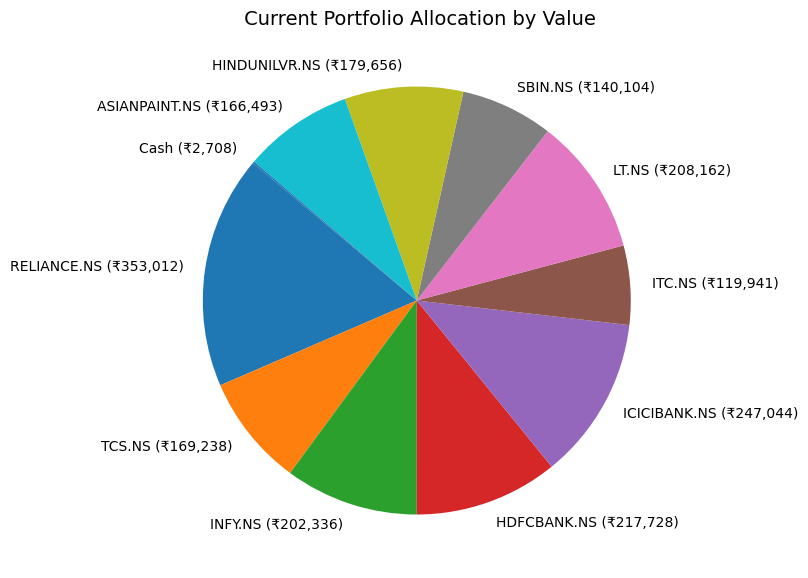

In [81]:

current_weights = [shares_purchased[t] * latest_prices[t] for t in tickers]
uninvested_cash = investment_amount - sum(shares_purchased[t] * first_day_prices[t] for t in tickers)
current_weights.append(uninvested_cash)
labels = tickers + ['Cash']
formatted_labels = [f"{label} (₹{value:,.0f})" for label, value in zip(labels, current_weights)]
plt.figure(figsize=(8, 8))
plt.pie(current_weights, labels=formatted_labels, startangle=140, textprops={'fontsize': 10})
plt.title(" Current Portfolio Allocation by Value", fontsize=14)
plt.tight_layout()
plt.show()


# BAR CHART SHOWING GAINS PER STOCK SINCE 2015

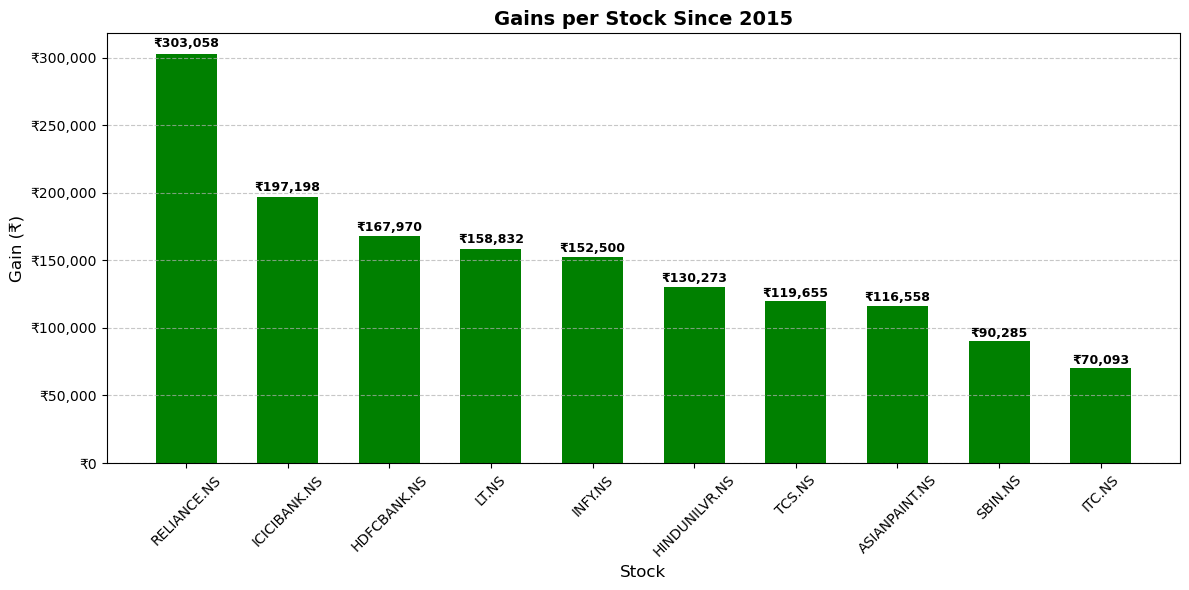

In [86]:
import matplotlib.ticker as mtick

stock_gains = {}
for ticker in tickers:
    invested = shares_purchased[ticker] * first_day_prices[ticker]
    current_val = shares_purchased[ticker] * latest_prices.get(ticker, 0)
    gain = current_val - invested
    stock_gains[ticker] = gain

gains_df = pd.DataFrame.from_dict(stock_gains, orient='index', columns=['Gain (₹)'])
gains_df = gains_df.sort_values(by='Gain (₹)', ascending=False)

colors = ['green' if val > 0 else 'red' for val in gains_df['Gain (₹)']]

plt.figure(figsize=(12, 6))
bars = plt.bar(gains_df.index, gains_df['Gain (₹)'], color=colors, width=0.6)
plt.title("Gains per Stock Since 2015", fontsize=14, fontweight='bold')
plt.xlabel("Stock", fontsize=12)
plt.ylabel("Gain (₹)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height * 1.01, f"₹{height:,.0f}", 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='black', rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# SUGGESTING OPTIMAL INVESTMENT PLAN USING CURRENT MARKET CAPITALIZATION WEIGHTS

In [89]:

def get_market_cap_weights(tickers):
    market_caps = {}
  
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        market_cap = info.get('marketCap')
        
        if market_cap:
            market_caps[ticker] = market_cap
        else:
            print(f"⚠️ Market cap not found for {ticker}")
    
    total_market_cap = sum(market_caps.values())
    market_weights = {t: cap / total_market_cap for t, cap in market_caps.items()}
    
    return market_weights


In [91]:
def suggest_investment_plan(tickers, market_weights, latest_prices, investment_amount):
    shares_to_buy = {}
    print(f"Recommended Shares to Buy (Market-Cap Weighted Allocation for ₹{investment_amount:,.2f}):\n")
    
    total_spent = 0
    for t in tickers:
        if t in market_weights and latest_prices.get(t, 0) > 0:
            amount_allocated = investment_amount * market_weights[t]
            price = latest_prices[t]
            num_shares = int(amount_allocated // price)
            shares_to_buy[t] = num_shares
            spent = num_shares * price
            total_spent += spent
            print(f"{t}: Buy {num_shares} shares (₹{price:.2f} each) → ₹{spent:,.2f}")
        else:
            print(f"{t}: Skipped (missing data)")

    uninvested_cash = investment_amount - total_spent
    print(f"\nUninvested Cash Remaining: ₹{uninvested_cash:,.2f}")
    
    return shares_to_buy, uninvested_cash



In [98]:
market_weights = get_market_cap_weights(tickers)
latest_prices = fetch_latest_prices(tickers)
new_investment = float(input("\nEnter new investment amount (₹) to allocate optimally: "))
shares_to_buy, uninvested_cash = suggest_investment_plan(tickers, market_weights, latest_prices, new_investment)



Enter new investment amount (₹) to allocate optimally:  500000


Recommended Shares to Buy (Market-Cap Weighted Allocation for ₹500,000.00):

RELIANCE.NS: Buy 76 shares (₹1429.20 each) → ₹108,619.20
TCS.NS: Buy 20 shares (₹3525.80 each) → ₹70,516.00
INFY.NS: Buy 23 shares (₹1568.50 each) → ₹36,075.50
HDFCBANK.NS: Buy 43 shares (₹1926.80 each) → ₹82,852.40
ICICIBANK.NS: Buy 40 shares (₹1444.70 each) → ₹57,788.00
ITC.NS: Buy 70 shares (₹433.00 each) → ₹30,310.00
LT.NS: Buy 7 shares (₹3589.00 each) → ₹25,123.00
SBIN.NS: Buy 50 shares (₹787.10 each) → ₹39,355.00
HINDUNILVR.NS: Buy 13 shares (₹2363.90 each) → ₹30,730.70
ASIANPAINT.NS: Buy 5 shares (₹2312.40 each) → ₹11,562.00

Uninvested Cash Remaining: ₹7,068.21


# RECOMMENDED INVESTMENT SUMMARY

In [100]:
summary_list = []

for t in tickers:
    price = latest_prices.get(t, 0)
    shares = shares_to_buy.get(t, 0)
    invested_amt = shares * price
    summary_list.append({
        'Ticker': t,
        'Shares to Buy': shares,
        'Price (₹)': round(price, 2),
        'Invested Amount (₹)': round(invested_amt, 2)
    })

summary_df = pd.DataFrame(summary_list)

print("Recommended Investment Summary:\n")
print(summary_df.to_string(index=False))

summary_df.to_excel('recommended_plan.xlsx', index=False)
print("Exported recommended plan to 'recommended_plan.xlsx'")


Recommended Investment Summary:

       Ticker  Shares to Buy  Price (₹)  Invested Amount (₹)
  RELIANCE.NS             76     1429.2             108619.2
       TCS.NS             20     3525.8              70516.0
      INFY.NS             23     1568.5              36075.5
  HDFCBANK.NS             43     1926.8              82852.4
 ICICIBANK.NS             40     1444.7              57788.0
       ITC.NS             70      433.0              30310.0
        LT.NS              7     3589.0              25123.0
      SBIN.NS             50      787.1              39355.0
HINDUNILVR.NS             13     2363.9              30730.7
ASIANPAINT.NS              5     2312.4              11562.0
Exported recommended plan to 'recommended_plan.xlsx'


In [101]:

print("Portfolio planning completed. Stay invested for the long term!")


Portfolio planning completed. Stay invested for the long term!
